In [55]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from sklearn.decomposition import PCA
import pandas as pd

# Vectors

## How it Looks

An ordered list of numbers. The dimensionality of a vector is the number of its numbers. If the vector contains 2 vectors, its a 2 dimensional vector. If it contains 500, its a 500 dimensional vector.

<b> v1 </b> = [1, 2, 3]

A vector is a straight line with some length and some direction

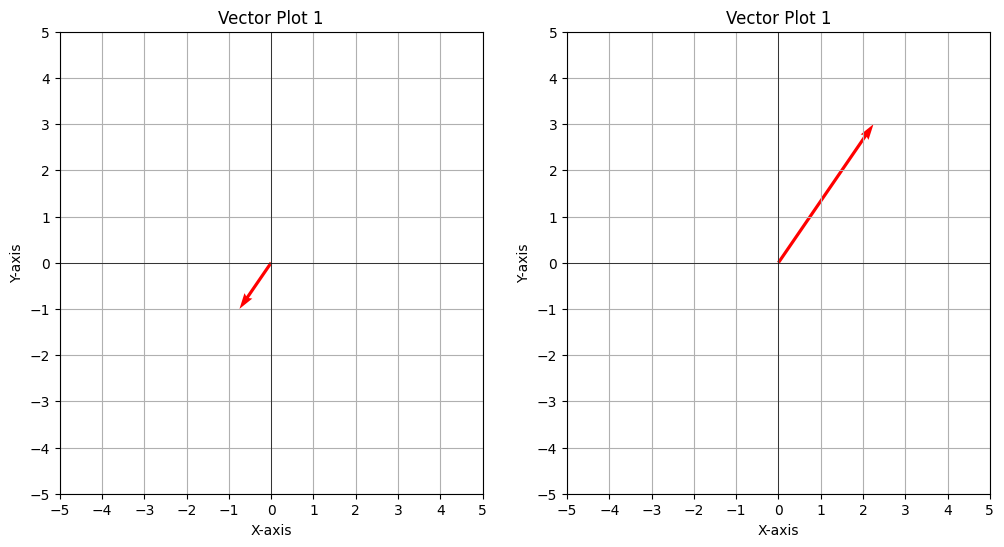

In [56]:
vector = np.array([3, 4])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

origin = np.array([0, 0])

for idx, ax in enumerate((ax1, ax2)):
    ax.set_xticks(np.arange(-5, 6, 1))
    ax.set_yticks(np.arange(-5, 6, 1))
    ax.quiver(*origin, *vector * (idx + -0.25), angles='xy', scale_units='xy', scale=1, color='r')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Vector Plot 1')
    ax.grid(True)

When a vector starts from the origin, its called being in standard position.

3d vector

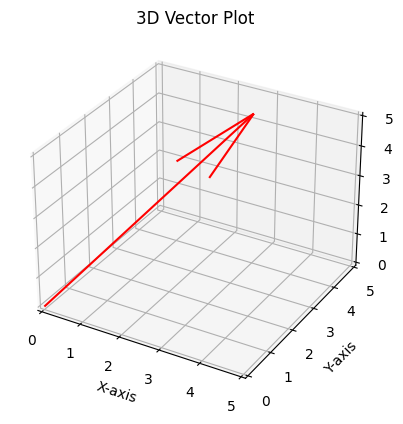

In [57]:
vector = np.array([3, 4, 5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.array([0, 0, 0])

ax.quiver(*origin, *vector, color='r')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Vector Plot')

plt.show()

## Fields & Dimensions

In [58]:
v1 = np.array([1,2,3])
v1

array([1, 2, 3])

Vector v's field is real numbers

Its dimensionality is N

$$\mathbf{v} \in \mathbb{R}^N$$

$$ \mathbb{R}^3 $$

## Operations on Vectors

### Calculating Vector Magnitude

$$
\|\mathbf{v}\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} = \sqrt{\sum_{i=1}^{n} v_i^2}
$$

In [59]:
v1_norm = math.sqrt((1**2 + 2**2 + 3**2))
v1_norm

3.7416573867739413

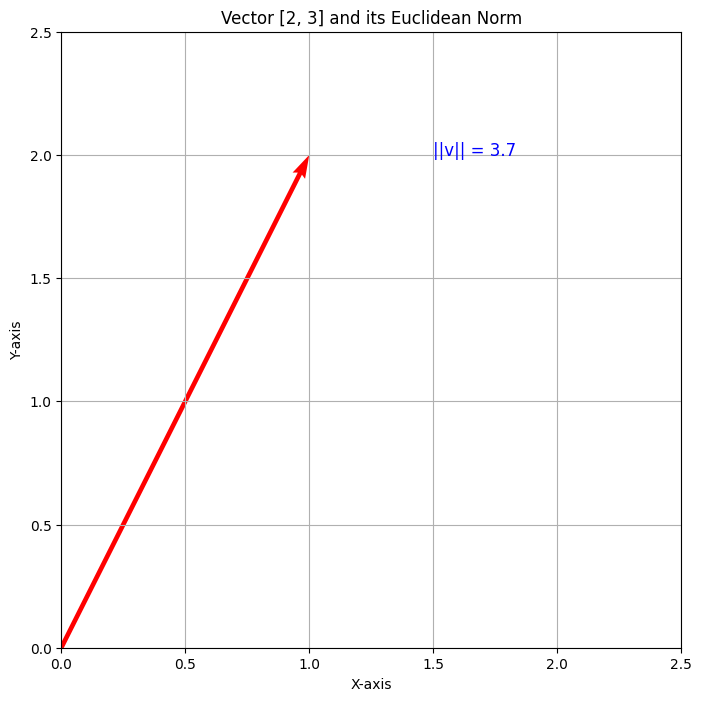

In [60]:
euclidean_norm = np.linalg.norm(v1)

plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.text(vector[0] / 2, vector[1] / 2, f'||v|| = {euclidean_norm:.1f}', fontsize=12, color='blue')

plt.title('Vector [2, 3] and its Euclidean Norm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Addition

In order to add 2 vectors, they must be of the same dimensionality

In [61]:
v1 = np.array([1,2])
v2 = np.array([3,4])

v1+v2

array([4, 6])

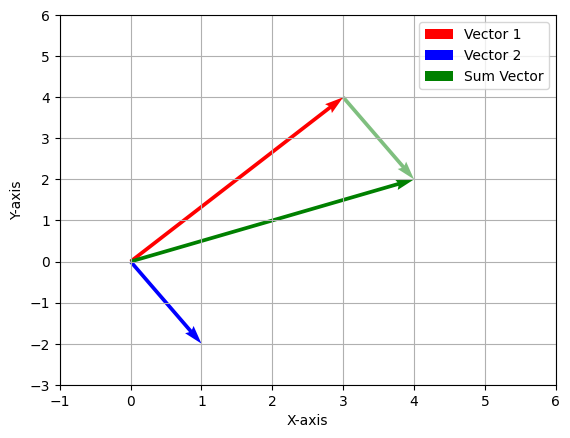

In [62]:
vector1 = np.array([3, 4])
vector2 = np.array([1, -2])

vector_sum = vector1 + vector2

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector1, angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
ax.quiver(*origin, *vector2, angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')
ax.quiver(*origin, *vector_sum, angles='xy', scale_units='xy', scale=1, color='g', label='Sum Vector')
ax.quiver(*vector1, *(vector_sum - vector1), angles='xy', scale_units='xy', scale=1, color='g',
          linestyle='dashed', alpha=0.5)

ax.set_xlim(-1, 6)
ax.set_ylim(-3, 6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.grid(True)

ax.legend()

ax.set_xticks(np.arange(-1, 7, 1))
ax.set_yticks(np.arange(-3, 7, 1))

plt.show()

### Multiplying a Vector By a Scalar

A scalar is number. Not a vector, just a plain old number. Multiplying a vector by a scalar does not change its direction, only its size.

In [63]:
v1 = np.array([1,2])
v1 * 2

array([2, 4])

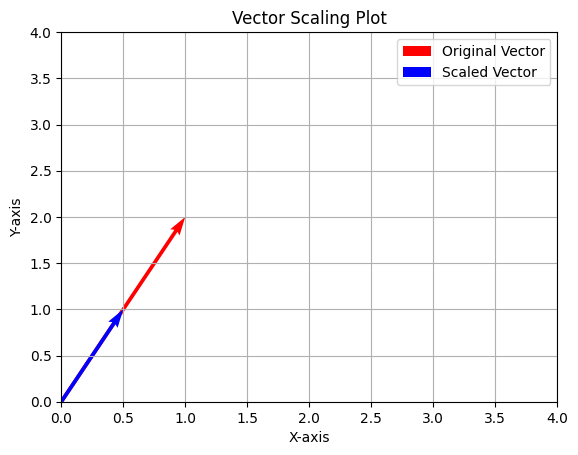

In [64]:
vector = np.array([1, 2])
scalar = 0.5

scaled_vector = scalar * vector

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
ax.quiver(*origin, *scaled_vector, angles='xy', scale_units='xy', scale=1, color='b', label='Scaled Vector')

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Scaling Plot')

ax.grid(True)
ax.legend()
plt.show()

There are a few ways to multiplie 2 vectors, the most common are:

1. Dot product
2. Hadamard 
3. Outer product

### Dot Product/Scalar Product

The dot product is used to represent similarity, projection or interaction between two vectors.
For example, finding the angle between two vectors. The cosine of an angle between two vectors is a measurement of how similar they are (as we will shortly see).

In [65]:
v1 = np.array([1,2])
v2 = np.array([3,4])

dot_product = v1.dot(v2)
dot_product

11

Dot product result is a scalar!

In [66]:
v1 = np.array([1, 2])
v2 = np.array([3, 4, 3])

dot_product = v1.dot(v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [67]:
a1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A1')
a2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A2')

b1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B1')
b2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B2')

def calculate_dot_product(a1, a2, b1, b2):
    vector_a = np.array([a1, a2])
    vector_b = np.array([b1, b2])
    dot_product = np.dot(vector_a, vector_b)
    print(f"Vector A: {vector_a}")
    print(f"Vector B: {vector_b}")
    print(f"Dot Product: {dot_product}")

output = widgets.interactive_output(calculate_dot_product, 
                                    {'a1': a1_slider, 'a2': a2_slider, 
                                     'b1': b1_slider, 'b2': b2_slider})

display(a1_slider, a2_slider, b1_slider, b2_slider, output)


IntSlider(value=1, description='A1', max=10, min=-10)

IntSlider(value=1, description='A2', max=10, min=-10)

IntSlider(value=1, description='B1', max=10, min=-10)

IntSlider(value=1, description='B2', max=10, min=-10)

Output()

#### What is Dot Product Useful For

1. Measuring the angle between two vectors.

In [68]:
# GloVe embeddings:

In [69]:
small_glove_embeddings = {
    'king': np.array([0.52654, -0.24538, 0.46737, 0.70348, 0.23647, 0.45902, -0.50265, -0.02281, 0.65211, -0.08349]),
    'queen': np.array([0.31703, -0.17573, 0.56205, 0.70857, 0.07399, 0.54469, -0.29225, -0.00839, 0.67575, 0.07804]),
    'man': np.array([0.42751, -0.20688, 0.45803, 0.63649, 0.18779, 0.31568, -0.37995, -0.06743, 0.48653, -0.09921]),
    'woman': np.array([0.25492, -0.15052, 0.52889, 0.67948, 0.04324, 0.44135, -0.21645, -0.05523, 0.56297, 0.03745]),
    'apple': np.array([0.19380, 0.21778, 0.38197, 0.66207, 0.08827, 0.28768, -0.34323, -0.10373, 0.52489, -0.16557]),
    'banana': np.array([0.11680, 0.27282, 0.31370, 0.58726, 0.16211, 0.35647, -0.32118, -0.12783, 0.50146, -0.19622]),
    'cat': np.array([0.24788, -0.04950, 0.31342, 0.63817, 0.03495, 0.21575, -0.28760, -0.08599, 0.46724, -0.18518]),
    'dog': np.array([0.30956, -0.06601, 0.29654, 0.58809, 0.09847, 0.23591, -0.31250, -0.05747, 0.49033, -0.14416]),
}

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

KING = 'king'
QUEEN = 'queen'
BANANA = 'banana'

vector1 = small_glove_embeddings[KING]
vector2 = small_glove_embeddings[QUEEN]
vector_3 = small_glove_embeddings[BANANA]

similarity = cosine_similarity(vector1, vector2)
less_similarity = cosine_similarity(vector1, vector_3)

print(f"Cosine Similarity between '{KING}' and '{QUEEN}': {similarity}")
print(f"Cosine Similarity between '{KING}' and '{BANANA}': {less_similarity}")

Cosine Similarity between 'king' and 'queen': 0.9586061635641476
Cosine Similarity between 'king' and 'banana': 0.8538639120049808


In [70]:
king = small_glove_embeddings['king']
queen = small_glove_embeddings['queen']
man = small_glove_embeddings['man']
woman = small_glove_embeddings['woman']

In [71]:
transformed_woman = king - man + woman
small_glove_embeddings['transformed_woman'] = transformed_woman

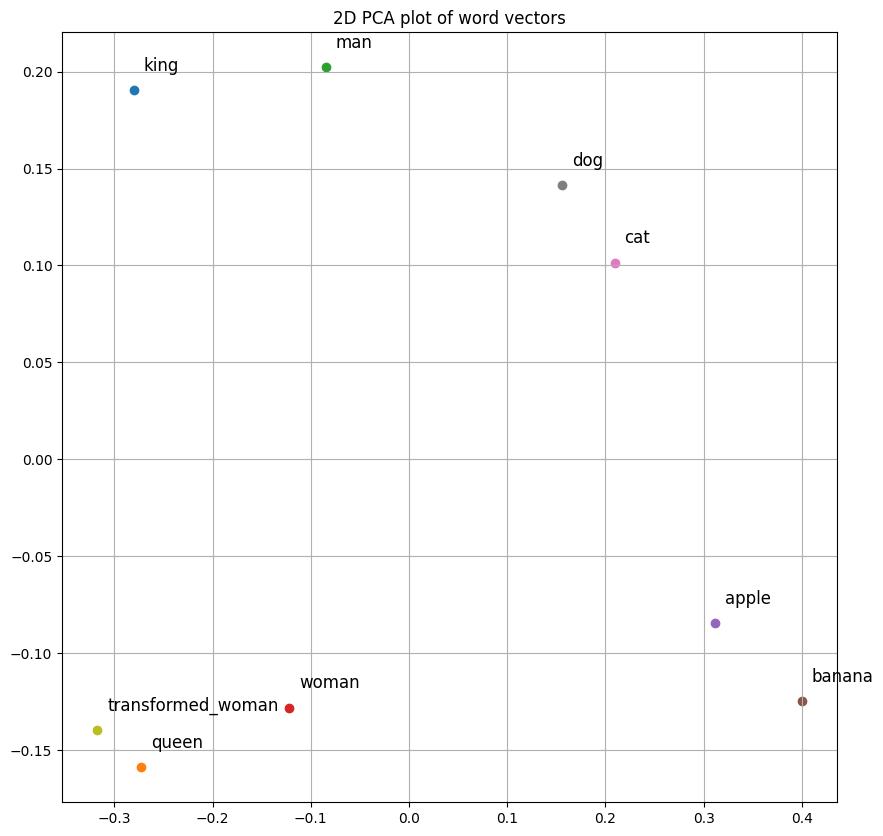

In [72]:
words = list(small_glove_embeddings.keys())
vectors = np.array(list(small_glove_embeddings.values()))

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 10))
for word, vector in zip(words, reduced_vectors):
    plt.scatter(vector[0], vector[1])
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=12)

plt.title("2D PCA plot of word vectors")
plt.grid(True)
plt.show()

### Hadamard/Element Wise Product

Used in the attention mechanism and regularizations techniques like dropout.

In [73]:
v3 = [1, 2, 3]
v4 = [3, 4, 5]

np.multiply(v3, v4)

array([ 3,  8, 15])

In [74]:
v3 = [1, 2, 3]
v4 = [3, 4, 5, 2]

np.multiply(v3, v4)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

### Outer Product

The outer product is used to create a matrix out of two vectors. One use of outer product is to create the covariance matrix in statistical analysis of features.

In [75]:
v5 = np.array([1,2,3])

In [76]:
v1, v5

(array([1, 2]), array([1, 2, 3]))

In [77]:
np.outer(v1, v5)

array([[1, 2, 3],
       [2, 4, 6]])

### Exercise

Pick two (or more if it goes too fast) of the multiplication methods and build it urself without using any tool.

numpy way of doing things

In [78]:
# dot product 
np.dot(v1,v2)

# Hadamard
v1 * v2

# outer product
np.outer(v1, v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)